In [1]:
import os, sys
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '/Users/holger/Desktop/master_thesis/data/arodz12/'
UNIPROT_ID = 'P0A7Y4'
DF_STRUCMAP = pd.read_excel(DATA_PATH + 'arodz12_protherm_singlemut_directonly.xls')
PDBS = DF_STRUCMAP['ProTherm PDB B']
PDBS = PDBS[527:].unique()
PDBS

array(['1gob', '1kva', '1kvb', '1lav', '1law', '1rbr', '1rbs', '1rbt',
       '1rbu', '1rbv', '1rda', '1rdb'], dtype=object)

In [ ]:
# Using withindirect excel file
DF_STRUCMAP = pd.read_excel(DATA_PATH + 'arodz12_protherm_singlemut_withindirect.xls')
UNIPROT_ID = 'P0A7Y4'
DF_STRUCMAP = pd.read_excel(DATA_PATH + 'arodz12_protherm_singlemut_directonly.xls')
PDBS = DF_STRUCMAP['ProTherm PDB B']
PDBS = PDBS[4039:].unique()
PDBS

In [3]:
def download_pdb(pdbcode, datadir, downloadurl="https://files.rcsb.org/download/"):
    """
    Downloads a PDB file from the Internet and saves it in a data directory.
    :param pdbcode: The standard PDB ID e.g. '3ICB' or '3icb'
    :param datadir: The directory where the downloaded file will be saved
    :param downloadurl: The base PDB download URL, cf.
        `https://www.rcsb.org/pages/download/http#structures` for details
    :return: the full path to the downloaded PDB file or None if something went wrong
    """
    pdbfn = pdbcode + ".pdb"
    url = downloadurl + pdbfn
    outfnm = os.path.join(datadir, pdbfn)
    try:
        urllib.request.urlretrieve(url, outfnm)
        return outfnm
    except Exception as err:
        print(str(err), file=sys.stderr)
        return None


In [4]:
# Downlaod structures
for i in range(len(PDBS)):
    download_pdb(PDBS[i], DATA_PATH + 'pdbs_P0A7Y4/')

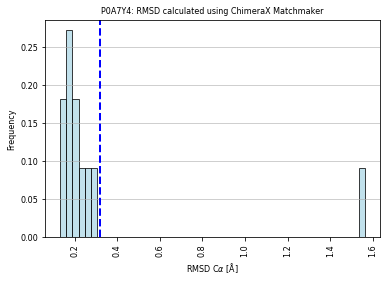

In [11]:
rmsd_list = [0.2820359474824164, 0.2609444069291343, 1.5618327539541343, 0.1640274919320007, 0.16594241640859145, 0.1979924613204179, 0.19170109262427837, 0.1565245021961146, 0.16933302786338808, 0.132198500719677, 0.2288215146483613]
output_variance_np = np.asarray(rmsd_list)
# Create histogram of means
hist,bin_edges = np.histogram(rmsd_list)
weights = np.ones_like(rmsd_list) / len(rmsd_list)
n, bins, patches = plt.hist(rmsd_list, 50, weights = weights, facecolor='lightblue', edgecolor='k', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel(r'RMSD C$\alpha$ [Å]',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.xticks(fontsize=8,rotation='vertical')
plt.yticks(fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.title('P0A7Y4: RMSD calculated using ChimeraX Matchmaker',fontsize=8)
plt.axvline(np.mean(rmsd_list), color='b', linestyle='dashed', linewidth=2)
plt.savefig('/Users/holger/Desktop/master_thesis/data/arodz12/figs/rmsd_dis_P0A7Y4.png', dpi=1200, bbox_inches = 'tight')

In [12]:
#Outlier:
# [['1kvb.pdb', 1.5618327539541343]]
len(rmsd_list)

11